# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas 

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS) : Valor do Aluguel (/) Rent amount 
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

### Importando os pacotes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
df.dtypes.value_counts()

int64     9
object    4
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema : Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [7]:
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True)

In [8]:
df['valor_aluguel'].mean()

3896.247194163861

In [9]:
df['valor_aluguel'].median()

2661.0

In [10]:
float(df['valor_aluguel'].mode())

2500.0

In [11]:
df['valor_aluguel'].std()

3408.5455176710816

In [12]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

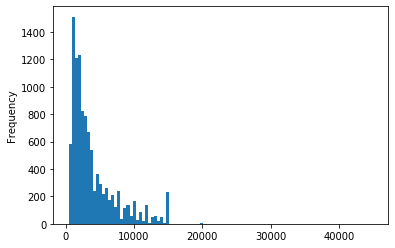

In [13]:
df['valor_aluguel'].plot(kind = 'hist', bins= 100)

In [14]:
df.shape[0]

10692

In [15]:
10692 * 0.75

8019.0

In [16]:
10692 * 0.50

5346.0

In [17]:
10692 * 0.25

2673.0

In [18]:
#skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [19]:
#kurtose - leptocurtica
df.valor_aluguel.kurtosis()

4.624228179818687

## Exploracao multivariáveis

### Perguntas
 
- Qual a cidade com a média de aluguel mais cara? 
- Quantos banheiros existem nas residencias com alugueis mais altos? 
- Os imóveis mais caros aceitam animal? 
- Os imóveis mais caros são mobiliados? 

In [40]:
#Qual a cidade com a média de aluguel mais alta? 

df.groupby('city')['valor_aluguel'].median().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,3400
0,Belo Horizonte,2300
3,Rio de Janeiro,2300
2,Porto Alegre,1650
1,Campinas,1500


In [41]:
#Quantos banheiros existem em média nas residencias com alugueis mais altos? 
## definicao: algueis mais altos são valores acima de 5000

df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]


In [42]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imovel maior o valor do aluguel.
- Os imoveis com mobilia tem o aluguel mais alto. 

In [43]:
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [44]:
df.corr(method = 'spearman')

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.848880,0.827743,0.701161,0.225983,0.728095,0.682270,0.745816,0.742642
rooms,0.848880,1.000000,0.769822,0.646679,0.206182,0.600969,0.595516,0.613788,0.621837
bathroom,0.827743,0.769822,1.000000,0.702826,0.293821,0.715890,0.654556,0.721150,0.740281
parking spaces,0.701161,0.646679,0.702826,1.000000,0.229139,0.620175,0.582921,0.625150,0.641078
hoa (R$),0.225983,0.206182,0.293821,0.229139,1.000000,0.355785,0.392537,0.293228,0.519755
valor_aluguel,0.728095,0.600969,0.715890,0.620175,0.355785,1.000000,0.659230,0.988045,0.968176
property tax (R$),0.682270,0.595516,0.654556,0.582921,0.392537,0.659230,1.000000,0.656049,0.731439
fire insurance (R$),0.745816,0.613788,0.721150,0.625150,0.293228,0.988045,0.656049,1.000000,0.945772
total (R$),0.742642,0.621837,0.740281,0.641078,0.519755,0.968176,0.731439,0.945772,1.000000


In [45]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})

In [46]:
aux

,colunas,tipos
city,city,object
area,area,int64
rooms,rooms,int64
bathroom,bathroom,int64
parking spaces,parking spaces,int64
floor,floor,object
animal,animal,object
furniture,furniture,object
hoa (R$),hoa (R$),int64
valor_aluguel,valor_aluguel,int64


In [47]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [48]:
lista

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'hoa (R$)',
 'valor_aluguel',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [60]:
for coluna in lista:
    print(coluna)
    print(str(df[['valor_aluguel', coluna]].corr(method = 'spearman')) + '\n\n')

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000


rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000


bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000


parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000


hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000


valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0


property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000


fire insurance (

## Visualização de dados

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

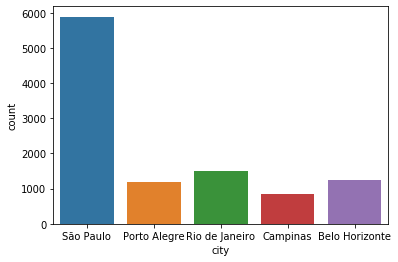

In [68]:
sns.countplot(x = 'city', data = df)

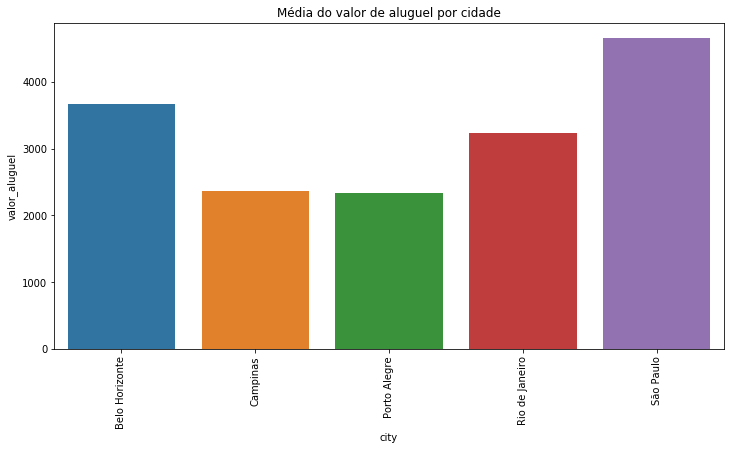

In [77]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'city', y = 'valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Média do valor de aluguel por cidade')
plt.xticks(rotation = 90)
plt.show()

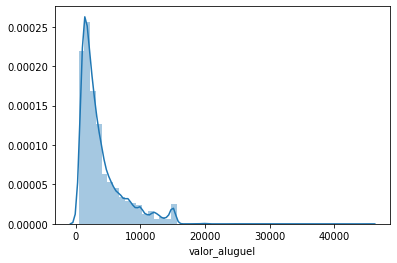

In [78]:
sns.distplot(df['valor_aluguel'])

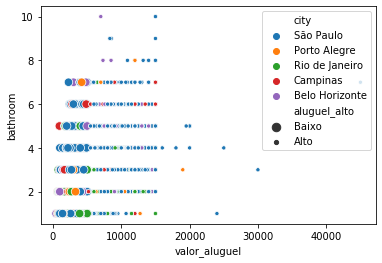

In [83]:
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', hue = 'city', size = ('aluguel_alto'), data = df)

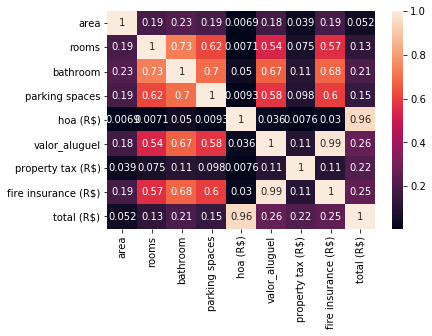

In [86]:
sns.heatmap(df.corr(), annot = True)

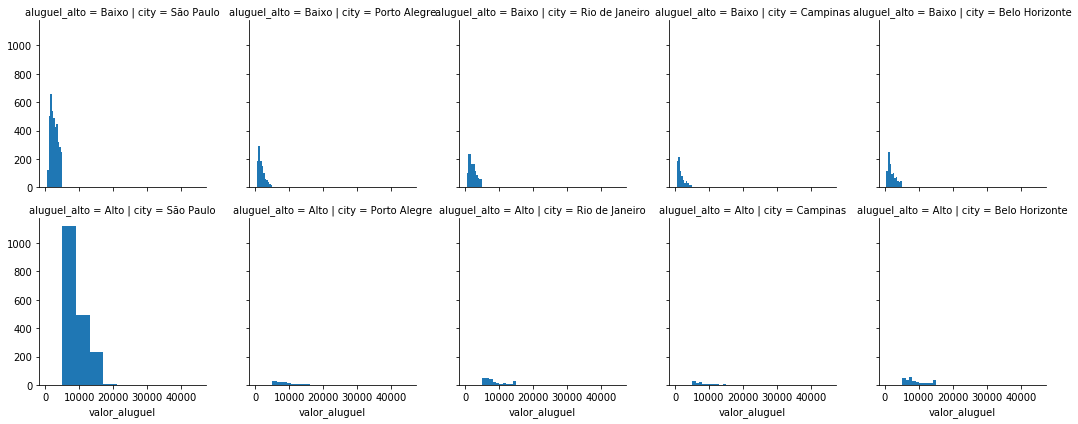

In [90]:
sns.FacetGrid(df, col = 'city', row = 'aluguel_alto').map(plt.hist, 'valor_aluguel')

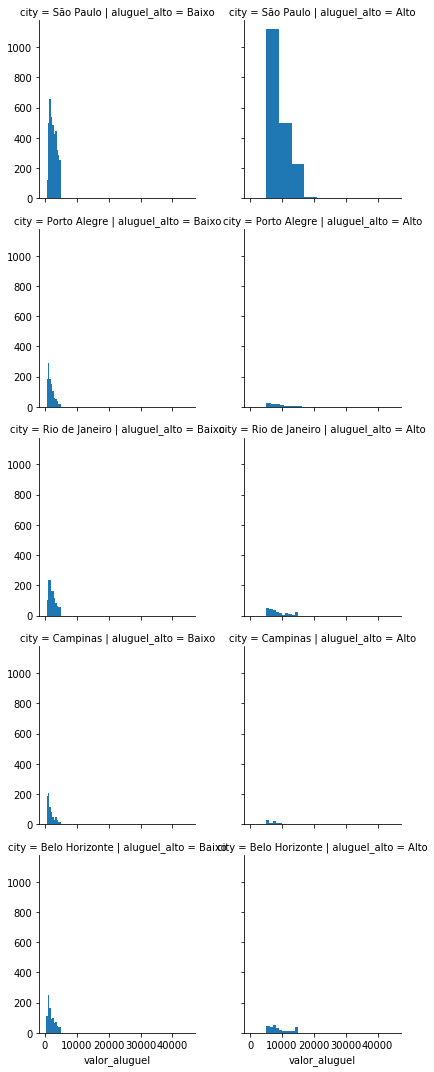

In [91]:
sns.FacetGrid(df, col = 'aluguel_alto', row = 'city').map(plt.hist, 'valor_aluguel')